In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

In [70]:
import yfinance as yfin
yfin.pdr_override()

start = '2004-01-01'
end = '2023-12-31'
df = pdr.get_data_yahoo('AAPL', start, end)

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,0.384821,0.388393,0.378214,0.380000,0.322118,144642400
2004-01-05,0.382500,0.399821,0.382500,0.395893,0.335590,395018400
2004-01-06,0.397321,0.400357,0.387679,0.394464,0.334379,509348000
2004-01-07,0.394643,0.407679,0.391607,0.403393,0.341948,586874400
2004-01-08,0.407857,0.423750,0.404464,0.417143,0.353604,460303200


In [71]:
#To change the index which is currently date and make it a normal column

df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-02,0.384821,0.388393,0.378214,0.380000,0.322118,144642400
1,2004-01-05,0.382500,0.399821,0.382500,0.395893,0.335590,395018400
2,2004-01-06,0.397321,0.400357,0.387679,0.394464,0.334379,509348000
3,2004-01-07,0.394643,0.407679,0.391607,0.403393,0.341948,586874400
4,2004-01-08,0.407857,0.423750,0.404464,0.417143,0.353604,460303200


In [72]:
#Droping the "Date","Adj Close" column from the table

df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,0.384821,0.388393,0.378214,0.380000,144642400
1,0.382500,0.399821,0.382500,0.395893,395018400
2,0.397321,0.400357,0.387679,0.394464,509348000
3,0.394643,0.407679,0.391607,0.403393,586874400
4,0.407857,0.423750,0.404464,0.417143,460303200


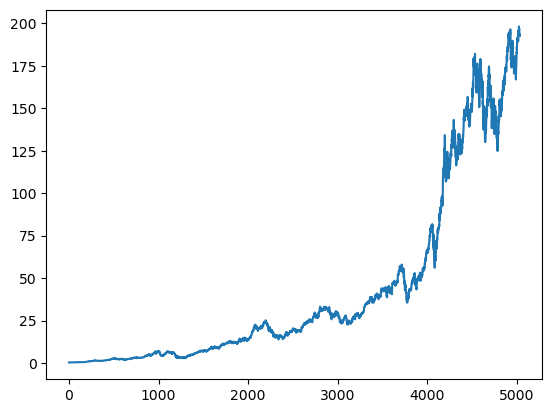

In [73]:
#Plotting the graph of column Close
plt.plot(df.Close)

In [75]:
#Findig the mean of the 50 prvious values

ma50=df.Close.rolling(50).mean()
ma50.head(55)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37         NaN
38         NaN
39         NaN
40         NaN
41         NaN
42         NaN
43         NaN
44         NaN
45         NaN
46         NaN
47         NaN
48         NaN
49    0.419611
50    0.421232
51    0.422668
52    0.423946
53    0.425114
54    0.426007
Name: Close, dtype: float64

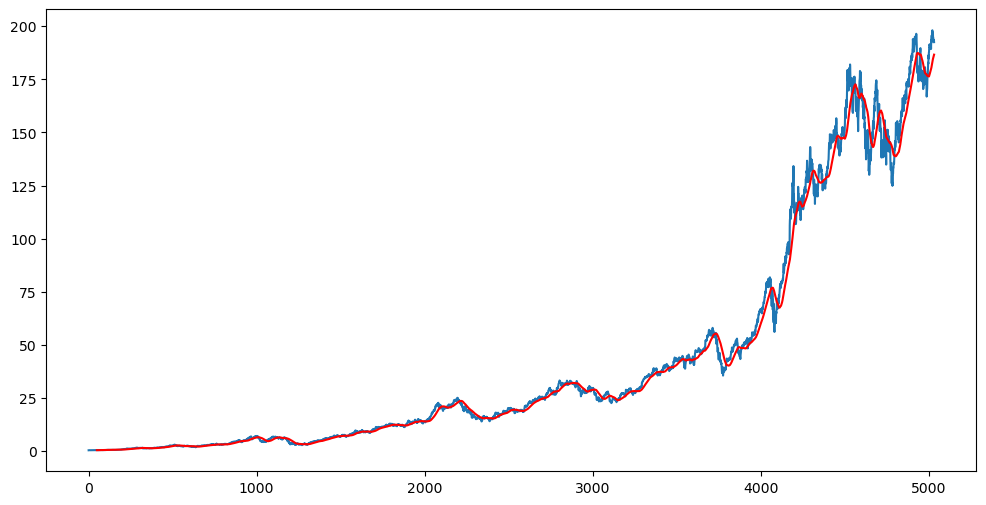

In [76]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma50,'r')

In [77]:
#Findig the mean of the 200 prvious values

ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
5028    178.649100
5029    178.871851
5030    179.085250
5031    179.290201
5032    179.487900
Name: Close, Length: 5033, dtype: float64

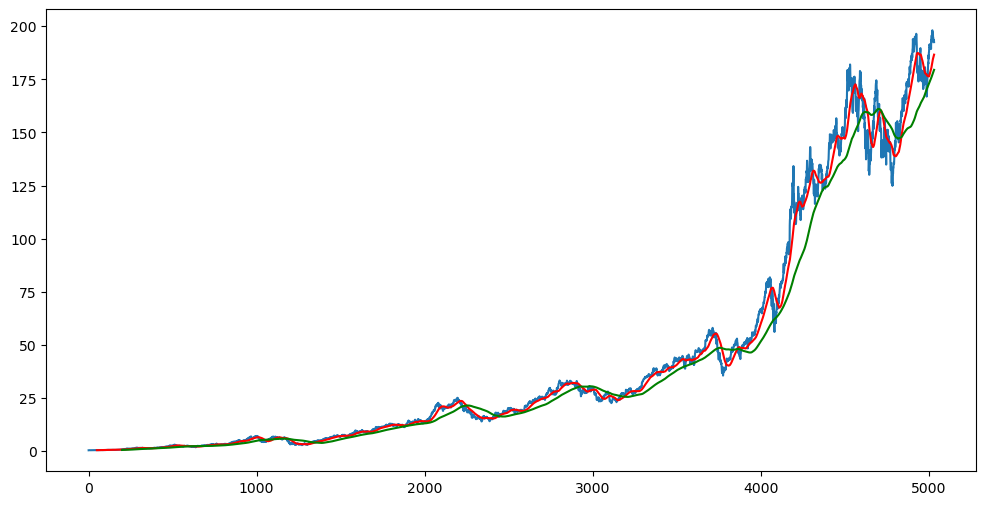

In [78]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma50,'r')
plt.plot(ma200,'g')

In [79]:
#Splitting Data into Training and Testing

In [80]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3523, 1)
(1510, 1)


In [81]:
data_testing.head()

,Close
3523,42.307499
3524,43.064999
3525,43.057499
3526,43.257500
3527,43.750000


In [82]:
#Scaling the data for that importing 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [83]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00000000e+00],
       [3.63476557e-04],
       [3.30794536e-04],
       ...,
       [9.66552368e-01],
       [9.66723887e-01],
       [9.69468288e-01]])

In [84]:
#Dividing the data in x_train and y_train
#Below with the step size of 100 its predicting the next value

x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [85]:
#ML Model

In [86]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [87]:
model=Sequential()


model.add(LSTM(units=50,activation='relu',return_sequences=True,
         input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [88]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [20]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100)


Epoch 1/100

107/107 [==============================] - 23s 154ms/step - loss: 0.0202
Epoch 2/100
107/107 [==============================] - 23s 212ms/step - loss: 0.0046
Epoch 3/100
107/107 [==============================] - 25s 237ms/step - loss: 0.0055
Epoch 4/100
107/107 [==============================] - 25s 235ms/step - loss: 0.0036
Epoch 5/100
107/107 [==============================] - 24s 220ms/step - loss: 0.0038
Epoch 6/100
107/107 [==============================] - 24s 228ms/step - loss: 0.0036
Epoch 7/100
107/107 [==============================] - 23s 213ms/step - loss: 0.0031
Epoch 8/100
107/107 [==============================] - 24s 227ms/step - loss: 0.0030
Epoch 9/100
107/107 [==============================] - 25s 235ms/step - loss: 0.0029
Epoch 10/100
107/107 [==============================] - 24s 226ms/step - loss: 0.0029
Epoch 11/100
107/107 [==============================] - 25s 239ms/step - loss: 0.0027
Epoch 12/100
107/107 [==============================] - 25s 2

In [89]:
#Savng the above trained model

In [21]:
model.save('trained_model.h5')

C:\Users\saumy\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [91]:
#For testing the first data in dataset we need the previous 100 values of data training data set
past_100_days = data_training.tail(100)

In [92]:
#Appending the last 100 previous values to the data testing set
final_df=pd.concat([past_100_days,data_testing],axis=0)

In [94]:
final_df.head()

,Close
3423,40.020000
3424,40.264999
3425,38.830002
3426,39.369999
3427,39.962502


In [95]:
#Need to scale down the above data
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02751249],
       [0.0290196 ],
       [0.02019224],
       ...,
       [0.96948862],
       [0.9721338 ],
       [0.96567473]])

In [96]:
input_data.shape

(1610, 1)

In [97]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [98]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1510, 100, 1)
(1510,)


In [46]:
#Make Predictions

y_predicted = model.predict(x_test)

48/48 [==============================] - 2s 20ms/step


In [99]:
y_predicted.shape

(1510, 1)

In [100]:
scaler.scale_

array([0.00615148])

In [101]:
#Getting the old values again
scale_factor=1/0.00615148
y_predicted=y_predicted * scale_factor
y_test= y_test*scale_factor

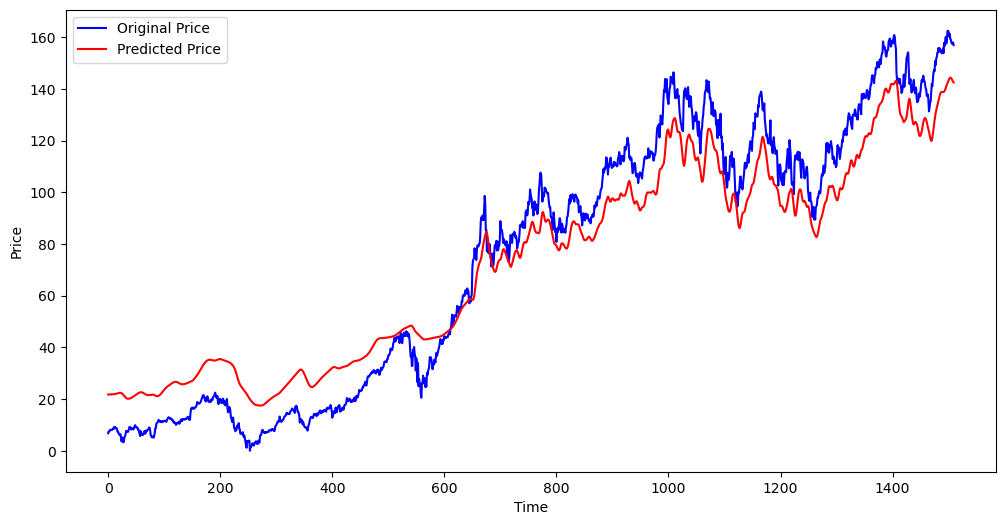

In [50]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label= 'Original Price')

plt.plot(y_predicted,'r',label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()